# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
df = pd.read_csv('../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [4]:
df2 = df.filter(['price', 'grade'])
df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

,price
grade,
7 Average,3.612884e+09
8 Good,3.293215e+09
9 Better,2.023325e+09
10 Very Good,1.216042e+09
6 Low Average,6.153060e+08
11 Excellent,5.976192e+08
12 Luxury,1.960250e+08
5 Fair,6.014280e+07
13 Mansion,4.824000e+07


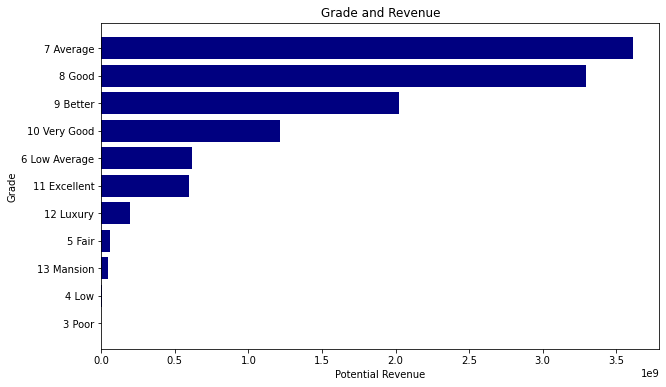

In [5]:
grade_vs_price = df2.groupby(['grade']).sum().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Grade and Revenue')
ax.set_ylabel('Grade')
ax.set_xlabel('Potential Revenue');

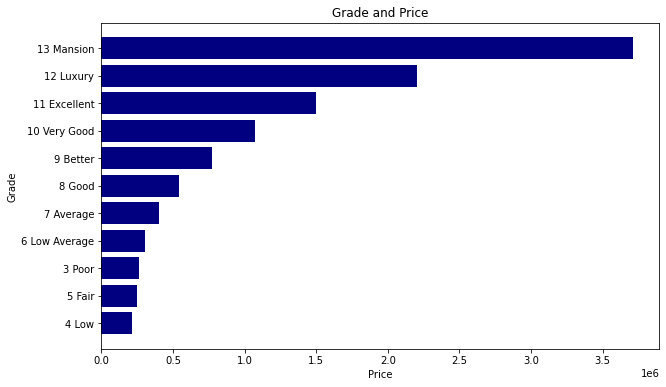

In [6]:
grade_vs_price = df2.groupby(['grade']).mean().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Grade and Price')
ax.set_ylabel('Grade')
ax.set_xlabel('Price');

#### Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

`sqft_above` - Square footage of house apart from basement

`sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors.

`sqft_living` - Square footage of living space in the home.


In [8]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
374.0         1
2180.0        1
915.0         1
225.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
#df['sqft_basement'].replace('?', 0, inplace=True)
#df['sqft_basement'] = df['sqft_basement'].astype(float)

In [10]:
df['condition'] = df['condition'].map({'Very Good':5,
                             'Good':4,
                             'Average':3,
                             'Fair':2,
                             'Poor':1})

In [11]:
df['grade'] = df['grade'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'FAIR':3,
                             'AVERAGE':2,
                             'NONE':1})

In [12]:
grade_df = df.filter(['grade', 'price'])
grade_df.replace('13 Mansion', 13, inplace=True) 
grade_df.replace('12 Luxury', 12, inplace=True) 
grade_df.replace('11 Excellent', 11, inplace=True) 
grade_df.replace('10 Very Good', 10, inplace=True) 
grade_df.replace('9 Better', 9, inplace=True) 
grade_df.replace('8 Good', 8, inplace=True) 
grade_df.replace('7 Average', 7, inplace=True) 
grade_df.replace('6 Low Average', 6, inplace=True) 
grade_df.replace('5 Fair', 5, inplace=True) 
grade_df.replace('4 Low', 4, inplace=True) 
grade_df.replace('3 Poor', 3, inplace=True) 
grade_df.head()
#make function?

,grade,price
0,NaN,221900.0
1,NaN,538000.0
2,NaN,180000.0
3,NaN,604000.0
4,NaN,510000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  int64  
 11  grade          0 non-null      float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [14]:
df['view'] = df['view'].map({'EXCELLENT':5,
                             'GOOD':4,
                             'FAIR':3,
                             'AVERAGE':2,
                             'NONE':1})

In [15]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
df = df[df['bedrooms'] <=30].copy()

Removed row with 33 bedrooms.

In [17]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,1.0,...,NaN,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650


In [18]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = df['date'].dt.strftime('%Y-%m')
date_price = df.filter(['date', 'price'])
date_price['date'].value_counts().sort_index()

2014-05    1768
2014-06    2177
2014-07    2211
2014-08    1939
2014-09    1771
2014-10    1876
2014-11    1409
2014-12    1470
2015-01     978
2015-02    1247
2015-03    1875
2015-04    2229
2015-05     646
Name: date, dtype: int64

In [19]:
date_price = df.filter(['date', 'price'])

In [20]:
date_price['date'].value_counts().sort_index()

2014-05    1768
2014-06    2177
2014-07    2211
2014-08    1939
2014-09    1771
2014-10    1876
2014-11    1409
2014-12    1470
2015-01     978
2015-02    1247
2015-03    1875
2015-04    2229
2015-05     646
Name: date, dtype: int64

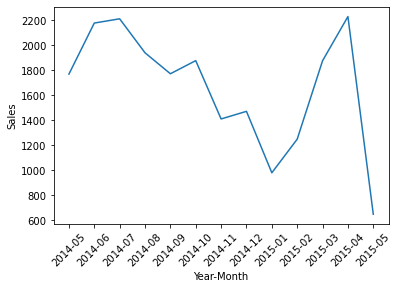

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Sales')

ax.plot(date_price['date'].value_counts().sort_index());

Plotted number of sales per month.

In [22]:
date_price = date_price.groupby(['date']).mean().sort_values(['date'])
date_price

,price
date,
2014-05,548166.600113
2014-06,557496.437758
2014-07,544892.161013
2014-08,536655.212481
2014-09,529723.517787
2014-10,539439.447228
2014-11,522359.903478
2014-12,524799.902041
2015-01,525963.251534


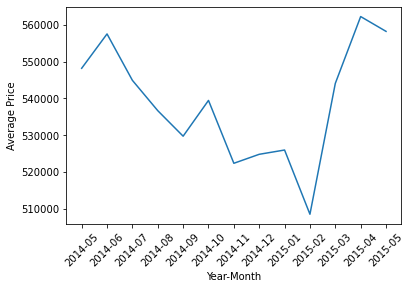

In [23]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Average Price')

ax.plot(date_price);

Plotted Year-Month against price.

In [24]:
df['date'].describe()

count       21596
unique         13
top       2015-04
freq         2229
Name: date, dtype: object

In [25]:
df['sqft_above'].describe()

count    21596.000000
mean      1788.631506
std        827.763251
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [26]:
df['sqft_living15'].describe()

count    21596.000000
mean      1986.650722
std        685.231768
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [27]:
df['sqft_living'].describe()

count    21596.000000
mean      2080.343165
std        918.122038
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [28]:
corr = df.corr().abs()
corr['price']
corr_w_price = corr['price'].sort_values(ascending=False)

In [29]:
corr_w_price

price            1.000000
sqft_living      0.701929
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.396937
bedrooms         0.315961
lat              0.306687
floors           0.256820
yr_renovated     0.129603
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
zipcode          0.053409
condition        0.036031
long             0.022047
id               0.016763
grade                 NaN
Name: price, dtype: float64

In [30]:
df2 = df.filter(['price', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_living15', 'date', 'bedrooms'])

Created df2 with items correlated with price with a correlation of >= .5

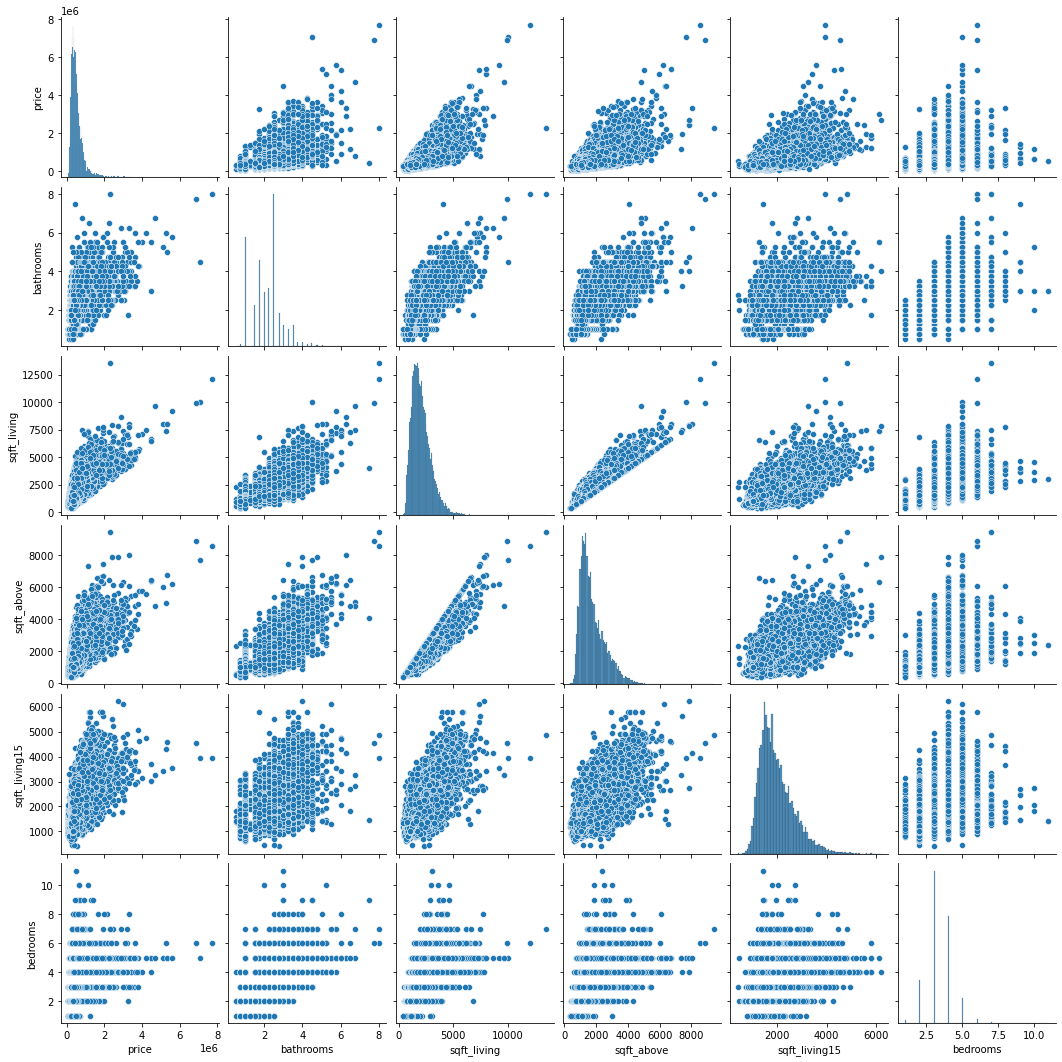

In [31]:
sns.pairplot(df2)

In [32]:
formula = 'price ~ bathrooms + sqft_living + sqft_above + sqft_living15 + bedrooms'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4602.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:52:14   Log-Likelihood:            -2.9954e+05
No. Observations:               21596   AIC:                         5.991e+05
Df Residuals:                   21590   BIC:                         5.991e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.225e+04   7872.032      4.097      0.000    1.68e+04    4.77e+04
bathrooms      1.149e+04   3508.548      3.274      0.001    4610.935    1.84e+04
sqft_living     306.7830      4.861     63.105      0.000     297.254     316.312
sqft_above      -44.7245      4.497     -9.945      0.000     -53.539     -35.910
sqft_living15    68.3301      3.987     17.137      0.000      60.515      76.146
bedrooms      -6.235e+04   2431.680    -25.640      0.000   -6.71e+04   -5.76e+04
==============================================================================
Omnibus:                    15008.472   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           600600.163
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      28.199   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
formula = 'price ~ bathrooms + sqft_living + sqft_above + sqft_living15'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     5423.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:52:14   Log-Likelihood:            -2.9987e+05
No. Observations:               21596   AIC:                         5.997e+05
Df Residuals:                   21591   BIC:                         5.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.773e+04   6113.243    -15.987      0.000    -1.1e+05   -8.58e+04
bathrooms     -2557.6057   3517.806     -0.727      0.467   -9452.766    4337.554
sqft_living     269.2606      4.706     57.217      0.000     260.037     278.485
sqft_above      -37.0267      4.555     -8.129      0.000     -45.954     -28.099
sqft_living15    75.2577      4.038     18.637      0.000      67.343      83.173
==============================================================================
Omnibus:                    15582.810   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           691805.044
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      30.078   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Jarque-Bera (JB) is high. skewness and kurtosis need to be addressed. Dropping bathrooms because it is insignificant.

In [34]:
df2.drop(['bathrooms'], axis=1, inplace=True)
formula = 'price ~ sqft_living + sqft_above + sqft_living15'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:52:14   Log-Likelihood:            -2.9987e+05
No. Observations:               21596   AIC:                         5.997e+05
Df Residuals:                   21592   BIC:                         5.998e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.979e+04   5419.369    -18.414      0.000    -1.1e+05   -8.92e+04
sqft_living     267.8148      4.265     62.792      0.000     259.455     276.175
sqft_above      -37.2911      4.540     -8.214      0.000     -46.190     -28.392
sqft_living15    75.3209      4.037     18.657      0.000      67.408      83.234
==============================================================================
Omnibus:                    15592.181   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           693360.039
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      30.109   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

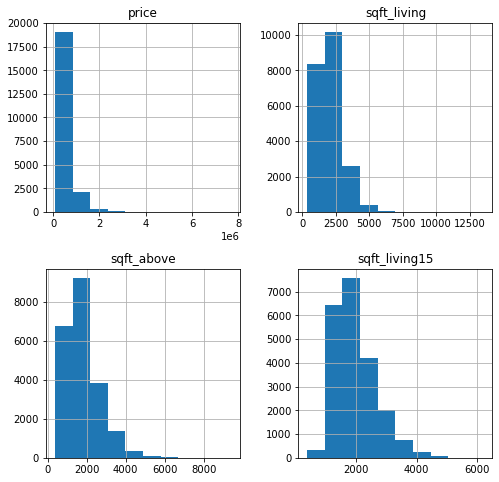

In [35]:
df2[['price', 'sqft_living', 'sqft_above', 'sqft_living15']].hist(figsize  = [8, 8]); 

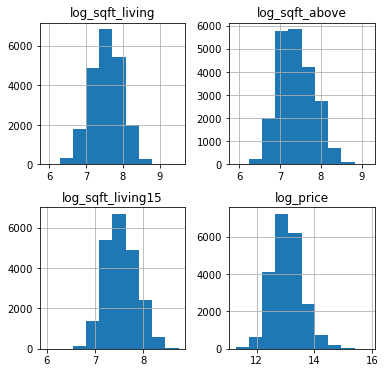

In [36]:
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(df2['sqft_living'])
data_log['log_sqft_above'] = np.log(df2['sqft_above'])
data_log['log_sqft_living15'] = np.log(df2['sqft_living15'])
data_log['log_price'] = np.log(df2['price'])
data_log.hist(figsize  = [6, 6]);
#Create a function

Used log transformation to normalize values. 

In [37]:
formula = 'log_price ~ log_sqft_living + log_sqft_above + log_sqft_living15'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     6649.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:52:15   Log-Likelihood:                -9726.1
No. Observations:               21596   AIC:                         1.946e+04
Df Residuals:                   21592   BIC:                         1.949e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.5401      0.060     92.908      0.000       5.423       5.657
log_sqft_living       0.6727      0.013     51.496      0.000       0.647       0.698
log_sqft_above       -0.0679      0.012     -5.517      0.000      -0.092      -0.044
log_sqft_living15     0.3888      0.012     32.099      0.000       0.365       0.412
==============================================================================
Omnibus:                      135.373   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.072
Skew:                           0.130   Prob(JB):                     2.30e-26
Kurtosis:                       2.748   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
data_log.corr()

,log_sqft_living,log_sqft_above,log_sqft_living15,log_price
log_sqft_living,1.000000,0.864986,0.746839,0.674820
log_sqft_above,0.864986,1.000000,0.713088,0.586062
log_sqft_living15,0.746839,0.713088,1.000000,0.607205
log_price,0.674820,0.586062,0.607205,1.000000


In [39]:
formula = 'log_price ~ log_sqft_living'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:52:15   Log-Likelihood:                -10230.
No. Observations:               21596   AIC:                         2.046e+04
Df Residuals:                   21594   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7232      0.047    142.609      0.000       6.631       6.816
log_sqft_living     0.8377      0.006    134.372      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.586   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.131
Skew:                           0.143   Prob(JB):                     1.65e-25
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Single sample model is worse than multi sample model.

In [40]:
category_df = df.filter(['price', 'condition', 'grade'])

In [41]:
condition_dummies = pd.get_dummies(category_df['condition'], prefix='con', drop_first=True)
grade_dummies = pd.get_dummies(category_df['grade'], prefix='grd', drop_first=True)

In [42]:
data = category_df.drop(['condition', 'grade',], axis=1)

In [43]:
data = pd.concat([data, condition_dummies, grade_dummies], axis=1)
data.head()

,price,con_2,con_3,con_4,con_5
0,221900.0,0,1,0,0
1,538000.0,0,1,0,0
2,180000.0,0,1,0,0
3,604000.0,0,0,0,1
4,510000.0,0,1,0,0


In [44]:
data.columns

Index(['price', 'con_2', 'con_3', 'con_4', 'con_5'], dtype='object')

In [45]:
chi, p_value, dof, expected = stats.contingency.chi2_contingency(data) 
p_value

0.0

Created dummy variable for grade and condition. Not sure what to do with them. 

In [46]:
category_df.head()

,price,condition,grade
0,221900.0,3,NaN
1,538000.0,3,NaN
2,180000.0,3,NaN
3,604000.0,5,NaN
4,510000.0,3,NaN


import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(16,10), sharey=True)

categoricals = ['condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (category_df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    ax.set_ylabel('price')
fig.tight_layout()

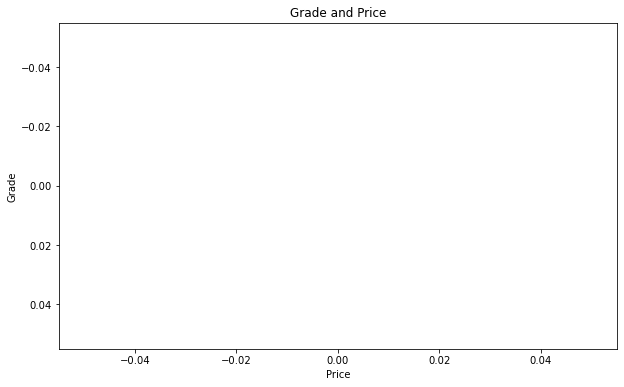

In [49]:
grade_vs_price = category_df.groupby(['grade']).mean().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=grade_vs_price.index, width=grade_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Grade and Price')
ax.set_ylabel('Grade')
ax.set_xlabel('Price');


In [ ]:
df.groupby(['grade']).mean().sort_values(['price'], ascending=False)

In [ ]:
category_df['grade'].value_counts()

Clearly the mansions sold for the most but there aren't many of them. In addition there aren't many poor, low and luxury grades either. Perhaps we will drop them. However there is a need to check significance levels.

In [ ]:
grade_df = category_df.filter(['grade', 'price'])
grade_df.replace('13 Mansion', 13, inplace=True) 
grade_df.replace('12 Luxury', 12, inplace=True) 
grade_df.replace('11 Excellent', 11, inplace=True) 
grade_df.replace('10 Very Good', 10, inplace=True) 
grade_df.replace('9 Better', 9, inplace=True) 
grade_df.replace('8 Good', 8, inplace=True) 
grade_df.replace('7 Average', 7, inplace=True) 
grade_df.replace('6 Low Average', 6, inplace=True) 
grade_df.replace('5 Fair', 5, inplace=True) 
grade_df.replace('4 Low', 4, inplace=True) 
grade_df.replace('3 Poor', 3, inplace=True) 
grade_df.head()
#make function?

In [ ]:
grade_df.corr()

In [ ]:
stats.contingency.chi2_contingency(grade_df) 


In [ ]:
formula = 'price ~ C(grade)'
lm = ols(formula, grade_df).fit()
sm.stats.anova_lm(lm)

Home grade has a correlation of .67 with a significant p-value of 0.0.

In [ ]:
condition_vs_price = category_df.groupby(['condition']).mean().sort_values(['price'], ascending=False)

fig, ax = plt.subplots(figsize=(10,6))

ax.barh(y=condition_vs_price.index, width=condition_vs_price['price'], color="navy")
ax.invert_yaxis()
ax.set_title('Condition and Price')
ax.set_ylabel('Condition')
ax.set_xlabel('Price');


In [ ]:
category_df['condition'].value_counts()

Homes in better Condition tend to sell for more. Although there is a need to check significance levels.

In [ ]:
condition_vs_price

In [ ]:
condition_df = category_df.filter(['condition', 'price'])
condition_df.replace('Very Good', 5, inplace=True) 
condition_df.replace('Good', 4, inplace=True) 
condition_df.replace('Average', 3, inplace=True) 
condition_df.replace('Fair', 2, inplace=True) 
condition_df.replace('Poor', 1, inplace=True) 
condition_df

In [ ]:
condition_df.corr()

In [ ]:
stats.contingency.chi2_contingency(condition_df) 

In [ ]:
formula = 'price ~ C(condition)'
lm = ols(formula, condition_df).fit()
sm.stats.anova_lm(lm)

Condition of home has a very weak correlation of .04 with a significance lower than alpha. 

Trimming the Fat

In [ ]:
df2.head()

In [ ]:
price_q75, price_q25 = np.percentile(df2['price'],[75,25])
intr_qrt = price_q75-price_q25
upper_price = price_q75 + (1.5*intr_qrt)
lower_price = price_q25 - (1.5*intr_qrt)
lower_price, upper_price

In [ ]:
df2 = df2[df2['price'] <= upper_price]

In [ ]:
formula = 'price ~ sqft_living + sqft_above + sqft_living15'
model = ols(formula=formula, data=df2).fit()
model_summary = model.summary()
model_summary

In [ ]:
df2[['price', 'sqft_living', 'sqft_above', 'sqft_living15']].hist(figsize  = [8, 8]); 

In [ ]:
data_log = pd.DataFrame([])
data_log['log_price'] = np.log(df2['price'])
data_log['log_sqft_living'] = np.log(df2['sqft_living'])
data_log['log_sqft_above'] = np.log(df2['sqft_above'])
data_log['log_sqft_living15'] = np.log(df2['sqft_living15'])
data_log.hist(figsize  = [6, 6]);

In [ ]:
formula = 'log_price ~ log_sqft_living + log_sqft_above + log_sqft_living15'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

In [ ]:
formula = 'log_price ~ log_sqft_living'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

Getting rid of outliers based on price has made the models worse.

In [ ]:
df2.head(1)

In [ ]:
sqft_living_q75, sqft_living_q25 = np.percentile(df2['sqft_living'],[75,25])
sqft_living_intr_qrt = sqft_living_q75-sqft_living_q25
upper_sqft_living = sqft_living_q75 + (1.5*sqft_living_intr_qrt)
lower_sqft_living = sqft_living_q25 - (1.5*sqft_living_intr_qrt)
lower_sqft_living, upper_sqft_living
df2 = df2[df2['sqft_living'] <= upper_sqft_living]
df2 = df2[df2['sqft_living'] >= lower_sqft_living]

sqft_above_q75, sqft_above_q25 = np.percentile(df2['sqft_above'],[75,25])
sqft_above_intr_qrt = sqft_above_q75-sqft_above_q25
upper_sqft_above = sqft_above_q75 + (1.5*sqft_above_intr_qrt)
lower_sqft_above = sqft_above_q25 - (1.5*sqft_above_intr_qrt)
lower_sqft_above, upper_sqft_above
df2 = df2[df2['sqft_above'] <= upper_sqft_above]
df2 = df2[df2['sqft_above'] >= lower_sqft_above]


sqft_living15_q75, sqft_living15_q25 = np.percentile(df2['sqft_living15'],[75,25])
sqft_living15_intr_qrt = sqft_living15_q75-sqft_living15_q25
upper_sqft_living15 = sqft_living15_q75 + (1.5*sqft_living15_intr_qrt)
lower_sqft_living15 = sqft_living15_q25 - (1.5*sqft_living15_intr_qrt)
lower_sqft_living15, upper_sqft_living15
df2 = df2[df2['sqft_living15'] <= upper_sqft_living15]
df2 = df2[df2['sqft_living15'] >= lower_sqft_living15]

#create a function
#def remove_outlier(df):
    #for x in df:
        #q1 = df[x].quantile(0.25)
        #q3 = df[x].quantile(0.75)
        #iqr = q3-q1 #Interquartile range
        #fence_low  = q1-1.5*iqr
        #fence_high = q3+1.5*iqr
        #df_out = df.loc[(df[x] > fence_low) & (df[x] < fence_high)]
    #return df_out

In [ ]:
df2[['price', 'sqft_living', 'sqft_above', 'sqft_living15']].hist(figsize  = [8, 8]); 

In [ ]:
data_log = pd.DataFrame([])
data_log['log_price'] = np.log(df2['price'])
data_log['log_sqft_living'] = np.log(df2['sqft_living'])
data_log['log_sqft_above'] = np.log(df2['sqft_above'])
data_log['log_sqft_living15'] = np.log(df2['sqft_living15'])
data_log.hist(figsize  = [6, 6]);

In [ ]:
formula = 'log_price ~ log_sqft_living + log_sqft_above + log_sqft_living15'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

In [ ]:
formula = 'log_price ~ log_sqft_living'
model = ols(formula=formula, data=data_log).fit()
model_summary = model.summary()
model_summary

In [ ]:
data_log.corr()

Removing outliers from based on sqft_living, sqft_above, and sqft_living15 has made the models worse. 

In [ ]:
import requests
import time
#time.sleep(.5)
import json

In [ ]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
api_keys = get_keys('/Users/zachrauch/.secret/Keys.json')
zap_key = api_keys['zap_key']

In [ ]:
#url = f'https://api.bridgedataoutput.com/api/v2/zgecon/region?access_token={zap_key}&regionCity=Seattle'
#url = f'https://api.bridgedataoutput.com/api/v2/zgecon/marketreport?access_token={zap_key}&metricTypeKey=zhvi&cutTypeKey=uc_sfrcondo&regionTypeID=6&regionCity=Seattle'

r = requests.get(url).json()
r

In [ ]:
date_price2 = df2.filter(['date', 'price'])
date_price2 = date_price.groupby(['date']).mean().sort_values(['date'])
date_price2

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Average Price')

ax.plot(date_price2);

In [ ]:
date_price2['price2'] = date_price2['price']
date_price2 = date_price2.filter(['date', 'price2'])

In [ ]:
date_comp = [date_price2, date_price]

In [ ]:
pd.concat(date_comp,
    join="inner", axis=1)

In [ ]:
df2['price'].describe()

In [ ]:
df['price'].describe()

Not sure why but the date-price graphs before and after the removal of price outliers are the same.

#### Removing outliers via z-score

In [ ]:
df = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
df2 = df[(np.abs(stats.zscore(df)) < 1).all(axis=1)]

In [ ]:
df

In [ ]:
df2

#### Removing outliers via quantile

In [ ]:
df = pd.read_csv('../../data/kc_house_data.csv')
df.info()

In [ ]:
df_test = df.filter(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15'])

In [ ]:
def remove_outlier(df):
    for x in df:
        q1 = df[x].quantile(0.25)
        q3 = df[x].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df.loc[(df[x] > fence_low) & (df[x] < fence_high)]
    return df_out

In [ ]:
remove_outlier(df_test)

In [ ]:
df